My attempt at applying machine learning techniques to train/predict breast cancer(malignant) detection model using sci-kit learn library

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#Append the path in google drive (not necessary if running on local disk), please check the respective project location for model.py file
import sys
sys.path.append("/content/drive/My Drive/Colab Notebooks/machine_learning/Breast Cancer Detection") 
from models import model

Loading and exploring the data using pandas dataframe

In [27]:
dataframe = pd.read_csv("/content/drive/My Drive/Colab Notebooks/machine_learning/Breast Cancer Detection/breast_cancer_data.csv")
dataframe.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [28]:
dataframe.shape

(569, 33)

Checking the dataframe to see if there are columns with na, NaN values and dropping the columns with such values 

In [29]:
dataframe.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [30]:
dataframe = dataframe.dropna(axis = 1)
dataframe.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
dataframe.shape     #please note that the last column has been dropped!

(569, 32)

Check the number of patients with benign tumor(B) and those with malignant cancer(M)

In [32]:
dataframe["diagnosis"].value_counts() 

B    357
M    212
Name: diagnosis, dtype: int64

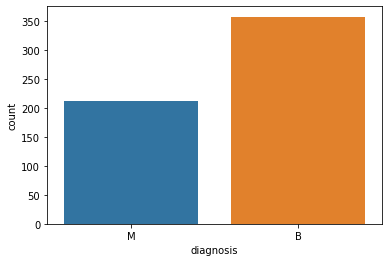

In [33]:
sns.countplot(dataframe["diagnosis"], label = "Count")

Steps for pre-processing the data to fit the model requirements

In [34]:
dataframe.iloc[:,1]     #The diagnosis column is object dtype, we need to change it into 0/1 labels

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [35]:
le_Y = LabelEncoder()     #We'll be using label encoder function of sklearn library to convert B/M into 0/1 labels
dataframe.iloc[:,1] = le_Y.fit_transform(dataframe.iloc[:,1].values)
print(dataframe.iloc[:,1])         

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


In [36]:
dataframe.shape

(569, 32)

In [37]:
X = dataframe.iloc[:,2:].values
Y = dataframe.iloc[:,1].values
print("Shape of X and Y matrices : "+str(X.shape)+str(Y.shape))


Shape of X and Y matrices : (569, 30)(569,)


In [38]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.25, random_state = 0)
print("Shape of train_X and train_Y : "+str(train_X.shape)+str(train_Y.shape))

Shape of train_X and train_Y : (426, 30)(426,)


In [39]:
SS = StandardScaler()     #Feature scaling using standard scalar function
train_X = SS.fit_transform(train_X)
test_X = SS.fit_transform(test_X)

Training the model using different supervised learning classifers. Please see the "model.py" for sklearn implementation of these models.

In [40]:
model_list = model(train_X, train_Y)

[0]Logistic Regression Training Accuracy :                  0.9906103286384976
[1]K Neighbours Classifier Training Accuracy :              0.9741784037558685
[2]Support Vector Classifier (Linear) Training Accuracy :   0.9859154929577465
[3]Support Vector Classifier (RBF) Training Accuracy :      0.9859154929577465
[4]Gaussian Naive Bayes Training Accuracy :                 0.9483568075117371
[5]Decision Tree Classifier Training Accuracy :             1.0
[6]Random Forest Classifier Training Accuracy :             0.9976525821596244


Printing the confusion matrix which is useful in medical diagnostic practices

In [41]:
for i in range(len(model_list)):
  conf_m = confusion_matrix(test_Y, model_list[i].predict(test_X))

  TP = conf_m[1][1]
  TN = conf_m[0][0]
  FP = conf_m[0][1]
  FN = conf_m[1][0]

  print(conf_m, " <-- Confusion matrix")
  print("Model [",i,"] Testing accuracy = ", ((TP+TN)/(TP+TN+FP+FN)))
  print("\n")

[[86  4]
 [ 2 51]]  <-- Confusion matrix
Model [ 0 ] Testing accuracy =  0.958041958041958


[[89  1]
 [ 6 47]]  <-- Confusion matrix
Model [ 1 ] Testing accuracy =  0.951048951048951


[[85  5]
 [ 2 51]]  <-- Confusion matrix
Model [ 2 ] Testing accuracy =  0.951048951048951


[[88  2]
 [ 3 50]]  <-- Confusion matrix
Model [ 3 ] Testing accuracy =  0.965034965034965


[[86  4]
 [ 5 48]]  <-- Confusion matrix
Model [ 4 ] Testing accuracy =  0.9370629370629371


[[85  5]
 [ 3 50]]  <-- Confusion matrix
Model [ 5 ] Testing accuracy =  0.9440559440559441


[[88  2]
 [ 1 52]]  <-- Confusion matrix
Model [ 6 ] Testing accuracy =  0.9790209790209791




Although we can calculate precision, recall and other metrics from confusion matrix, let's use "classification_report()" and "accuracy_score()" function of sklearn library here.

In [42]:
for i in range(len(model_list)):

  print("Classification report of model [",i,"]")
  print(classification_report(test_Y, model_list[i].predict(test_X)))
  print("Accuracy score of model [",i,"]")
  print(accuracy_score(test_Y, model_list[i].predict(test_X)))
  print("======================================================")

Classification report of model [ 0 ]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        90
           1       0.93      0.96      0.94        53

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

Accuracy score of model [ 0 ]
0.958041958041958
Classification report of model [ 1 ]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        90
           1       0.98      0.89      0.93        53

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143

Accuracy score of model [ 1 ]
0.951048951048951
Classification report of model [ 2 ]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        90
           1       0.91      0

Sincere references go to:

*   https://medium.com/@randerson112358/breast-cancer-detection-using-machine-learning-38820fe98982
*   https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

*   https://www.facebook.com/pythonML.Myanmar





